<a href="https://colab.research.google.com/github/laewonJeong/Data-Analysis-Programming/blob/main/DAP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraires**

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Pokemon Data**

In [379]:
df = pd.read_csv('All_Pokemon.csv')
df.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [380]:
df.describe()

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1.032000e+03,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,439.226744,69.906008,80.526163,74.609496,72.918605,72.139535,68.548450,438.648256,73.108043,20.028104,4.432171,1.061362e+06,0.564922,93.879845,0.121124,0.048450,0.017442,0.019380,0.867490,1.147045,1.061289,1.045785,1.005814,1.210514,1.074612,0.956395,1.128391,1.171996,0.975533,1.002180,1.239826,1.025678,0.974806,1.074855,0.992006,1.094234,1.286822,71.879845,136.735756
std,261.871350,26.189155,32.542374,30.905972,32.773495,27.625876,30.219526,120.675545,20.112591,10.830298,2.263713,1.570876e+05,0.496008,76.316071,0.326430,0.214818,0.130974,0.137923,0.288087,0.703754,0.607551,0.635515,0.748643,0.759727,0.758243,0.544938,0.762139,0.593650,0.500431,0.613111,0.699361,0.577269,0.378040,0.475292,0.511859,0.535159,1.391501,132.872741,3111.666658
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,1.000000,6.000000e+05,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,211.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.801910,3.000000,1.000000e+06,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,434.500000,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,459.000000,76.500000,18.484228,5.000000,1.000000e+06,1.000000,60.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,667.250000,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.835709,6.000000,1.250000e+06,1.000000,127.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.275000,42.200000
max,898.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,8.000000,1.640000e+06,1.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


# **Handling Missing Value**
Type 2열의 Null값이 있는 것을 확인

In [381]:
df.isnull().sum()

Number                       0
Name                         0
Type 1                       0
Type 2                     484
Abilities                    0
HP                           0
Att                          0
Def                          0
Spa                          0
Spd                          0
Spe                          0
BST                          0
Mean                         0
Standard Deviation           0
Generation                   0
Experience type              0
Experience to level 100      0
Final Evolution              0
Catch Rate                   0
Legendary                    0
Mega Evolution               0
Alolan Form                  0
Galarian Form                0
Against Normal               0
Against Fire                 0
Against Water                0
Against Electric             0
Against Grass                0
Against Ice                  0
Against Fighting             0
Against Poison               0
Against Ground               0
Against 

In [382]:
df = df.drop(['Type 2'], axis = 'columns')
df.isnull().sum()

Number                     0
Name                       0
Type 1                     0
Abilities                  0
HP                         0
Att                        0
Def                        0
Spa                        0
Spd                        0
Spe                        0
BST                        0
Mean                       0
Standard Deviation         0
Generation                 0
Experience type            0
Experience to level 100    0
Final Evolution            0
Catch Rate                 0
Legendary                  0
Mega Evolution             0
Alolan Form                0
Galarian Form              0
Against Normal             0
Against Fire               0
Against Water              0
Against Electric           0
Against Grass              0
Against Ice                0
Against Fighting           0
Against Poison             0
Against Ground             0
Against Flying             0
Against Psychic            0
Against Bug                0
Against Rock  

# **능력치 제외하고 쓸데 없는 columns 삭제**

In [384]:
df= df.drop(['Experience to level 100', 'Abilities','Standard Deviation',      
             'Final Evolution', 'Mega Evolution',
             'Alolan Form', 'Galarian Form', 'Against Normal', 'Against Fire',
             'Against Water', 'Against Electric', 'Against Grass', 'Against Ice',
             'Against Fighting', 'Against Poison', 'Against Ground',
             'Against Flying', 'Against Psychic', 'Against Bug', 'Against Rock',
             'Against Ghost', 'Against Dragon', 'Against Dark', 'Against Steel',
             'Against Fairy','BMI'],axis='columns')# 쓸데 없는 columns 삭제


In [385]:
df.head()

,Number,Name,Type 1,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Generation,Experience type,Catch Rate,Legendary,Height,Weight
0,1,Bulbasaur,Grass,45,49,49,65,65,45,318,53.000000,1.0,Medium Slow,45,0.0,0.7,6.9
1,2,Ivysaur,Grass,60,62,63,80,80,60,405,67.500000,1.0,Medium Slow,45,0.0,1.0,13.0
2,3,Venusaur,Grass,80,82,83,100,100,80,525,87.500000,1.0,Medium Slow,45,0.0,2.0,100.0
3,3,Mega Venusaur,Grass,80,100,123,122,120,80,625,104.166667,6.0,Medium Slow,45,0.0,2.4,155.5
4,4,Charmander,Fire,39,52,43,60,50,65,309,51.500000,1.0,Medium Slow,45,0.0,0.6,8.5


# **Visulization**

Check Type

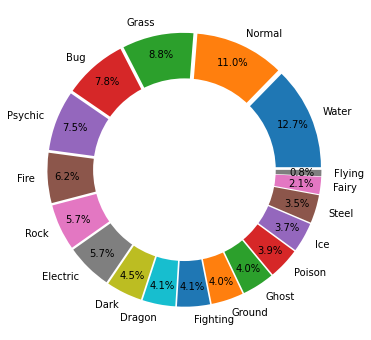

In [386]:
df_type = df['Type 1'].value_counts()
fig, ax = plt.subplots(figsize=(6,6))
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

ax.pie(df_type.values, labels = df_type.index, autopct='%1.1f%%', pctdistance=0.85, explode = explode )

#draw white circle in the middle
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

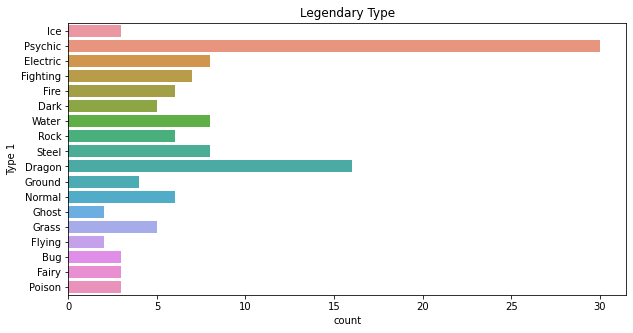

In [387]:
LType = df[df['Legendary']==1.0]['Type 1']
LType = pd.DataFrame(LType)

plt.figure(figsize = (10,5))
sns.countplot(y = 'Type 1',data=LType)
plt.title("Legendary Type")
plt.show()

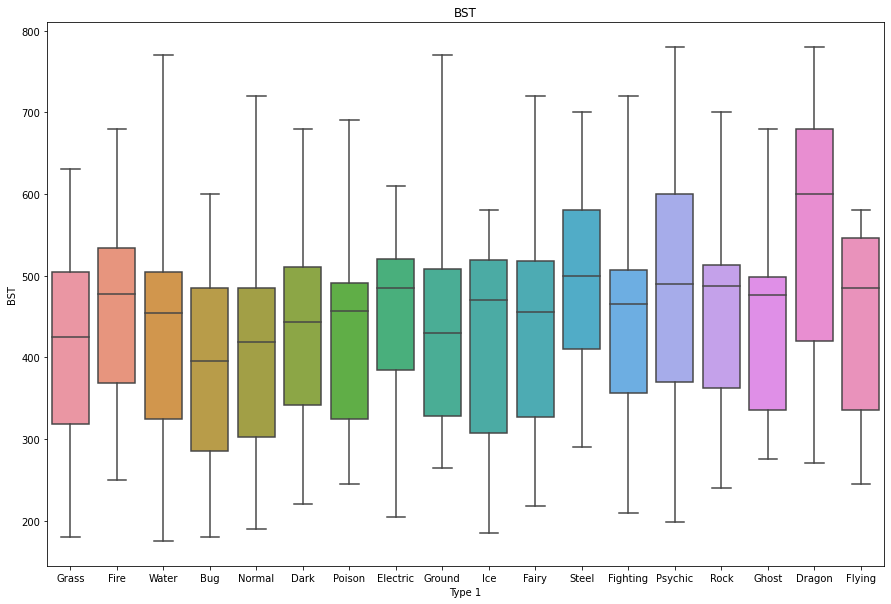

In [388]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df, x = 'Type 1', y = 'BST')
plt.title("BST")
plt.show()

Check Generation

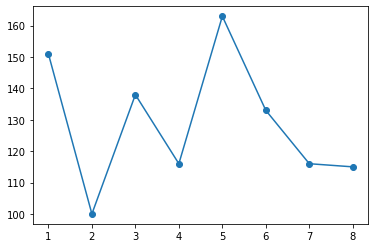

In [389]:
# 몇세대 포켓몬이 제일 많은지 선그래프를 이용해 확인
df_generation = df['Generation'].value_counts().sort_index()
plt.plot(df_generation, marker ='o')
plt.show()

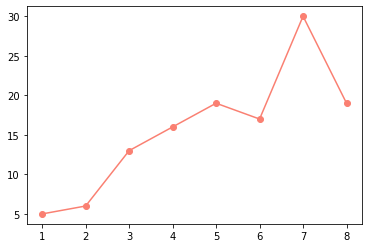

In [390]:
# 전설의 포켓몬은 몇세대가 많은지 선그래프를 이용해 확인
df_legendary = df[df['Legendary']==1]
df_Lgeneration = df_legendary['Generation'].value_counts().sort_index()
plt.plot(df_Lgeneration, marker = 'o', color='salmon')
plt.show()

Check Legendary

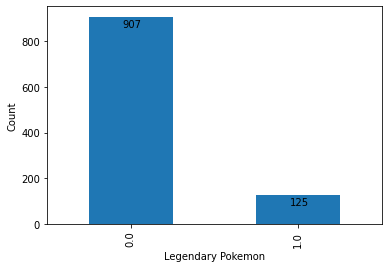

In [391]:
df_legendary = df['Legendary'].value_counts()
df_legendary.plot.bar(xlabel="Legendary Pokemon", ylabel = "Count")
plt.text(0.95,80,df_legendary[1])
plt.text(-0.05,860,df_legendary[0])
plt.show()

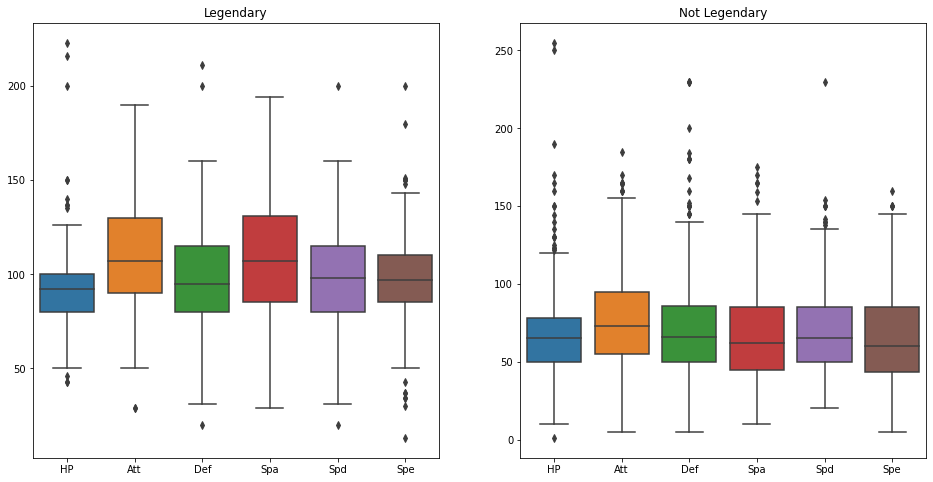

In [393]:
# 능력치 분포 박스플롯으로 확인
fig = plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
data2 = df[df['Legendary']==1.0]
data2 = data2.drop(['Number','Name','Type 1','Mean','Generation','Experience type','Catch Rate', 'Legendary', 'Height', 'Weight', 'BST'], axis = 'columns')
sns.boxplot(data = data2)

plt.title('Legendary')

plt.subplot(1,2,2)
data3 = df[df['Legendary']==0.0]
data3 = data3.drop(['Number','Name','Type 1','Mean','Generation','Experience type','Catch Rate', 'Legendary', 'Height', 'Weight', 'BST'], axis = 'columns')
sns.boxplot(data = data3)

plt.title('Not Legendary')

plt.show()

능력치 총합 분포

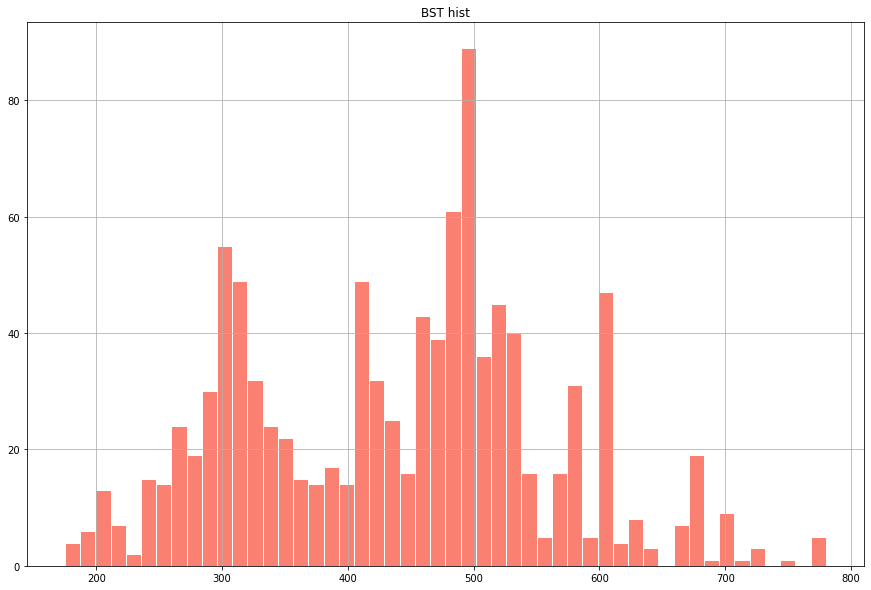

In [451]:
fig = plt.figure(figsize = (15,10))
df['BST'].hist(bins=50,histtype='bar', color = 'salmon', edgecolor='white')
plt.title('BST hist')
plt.show()

Experience Type Visualization

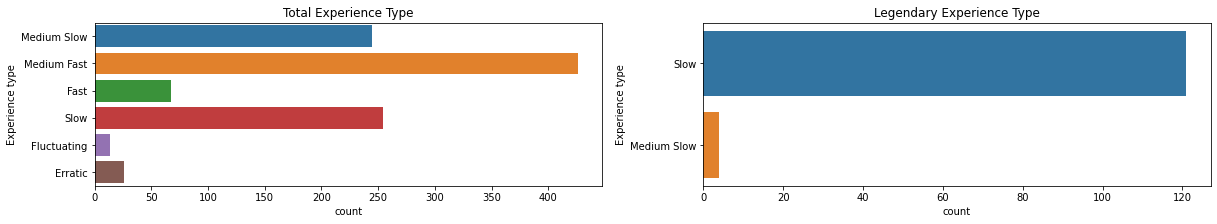

In [400]:
plt.figure(figsize = (20,3))
plt.subplot(1,2,1)
Total_EType = df['Experience type']
Total_EType = pd.DataFrame(Total_EType)
sns.countplot(y = 'Experience type',data=Total_EType)
plt.title("Total Experience Type")

plt.subplot(1,2,2)
L_EType = df[df['Legendary']==1.0]['Experience type']
L_EType = pd.DataFrame(L_EType)
sns.countplot(y = 'Experience type',data=L_EType)
plt.title("Legendary Experience Type")

plt.show()

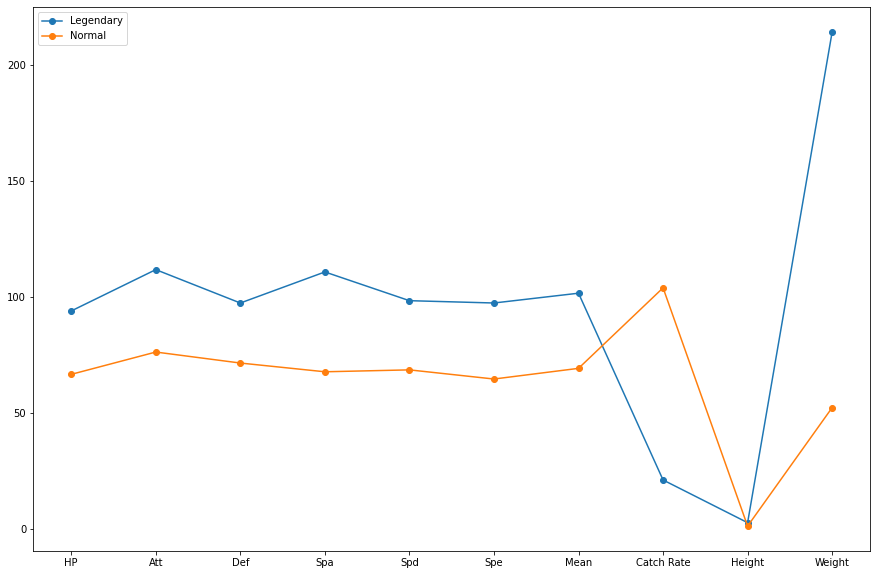

In [402]:
df_legendary = pd.DataFrame(df[df['Legendary']!=0])
df_normal = pd.DataFrame(df[df['Legendary']==0])

#전설의 포켓몬의 모든 값의 평균 구하기
a = df_legendary.describe()
a = pd.DataFrame(a)
a = a.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max'])# 평균값 빼고 다 제거
a= a.drop(['Number', 'Generation', 'Legendary','BST' ],axis='columns')# 쓸데 없는 columns 삭제
a = a.T

#그냥 노말 포켓몬의 모든 값의 평균 구하기
b = df_normal.describe()
b = pd.DataFrame(b)
b = b.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max']) # 평균값 빼고 다 제거
b= b.drop(['Number', 'Generation', 'Legendary','BST'],axis='columns') # 쓸데 없는 columns 삭제
b = b.T

#선 그래프로 보이기
plt.figure(figsize = (15,10))
plt.plot(a,marker='o')
plt.plot(b,marker='o')
plt.legend(['Legendary','Normal'])

Mean값을 큰 순으로 정렬하고 상위 15마리 포켓몬이 전설의 포켓몬인지 확인

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


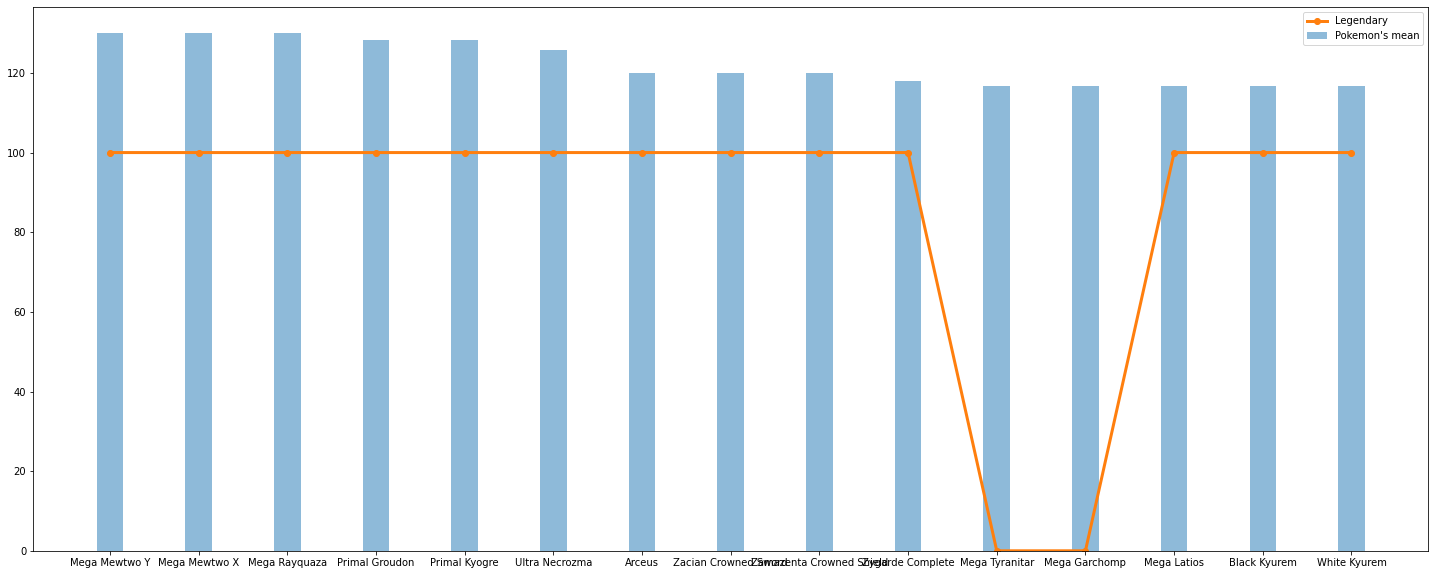

In [435]:
df_Mean = df.sort_values(by=['Mean'],axis = 0,ascending=False) #전체 능력치의 평균이 높은 순으로 정렬
# 평균 값과 이름과 Legendary 빼고 다 제거
df_Mean = df_Mean.drop(['Number', 'Type 1', 'HP', 'Att', 'Def', 'Spa',
       'Spd', 'Spe', 'BST', 'Generation',
       'Experience type', 'Height', 'Weight'], axis ='columns')

df_Mean = df_Mean.reset_index(drop=True) #인덱스 넘버 값을 리셋

df_Mean = df_Mean.drop(labels = range(15,1032), axis = 0) # 0 ~ 14까지의 행만 남겨두고 삭제

for i in range(len(df_Mean['Legendary'])):
  df_Mean['Legendary'][i] = df_Mean['Legendary'][i]*100 #전설의 포켓몬인지 확인하기 위해 모든 Legendary 값의 100을 곱함

plt.figure(figsize=(25,10)) 
xtick_label_position = list(range(len(df_Mean['Name']))) 
plt.xticks(xtick_label_position, df_Mean['Name'])
 
# 바 차트 출력, 막대기 색깔을 파란색으로 설정, 선 그래프는 주황색으로 설정
plt.bar(xtick_label_position, df_Mean['Mean'], width=0.3,alpha = 0.5)
df_Mean['Legendary'].plot(color='#ff7f0e',linestyle = 'solid',linewidth = 3.0,marker='o')
plt.legend(['Legendary','Pokemon\'s mean'])
plt.show()

# **Train Test Split**

실수값 아닌 것들 One Hot coding

In [427]:
ML_df = df
ML_df = ML_df.drop('Name',axis = 'columns')
ML_df = pd.get_dummies(ML_df)

ML_df.head()

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Generation,Catch Rate,Legendary,Height,Weight,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Experience type_Erratic,Experience type_Fast,Experience type_Fluctuating,Experience type_Medium Fast,Experience type_Medium Slow,Experience type_Slow
0,1,45,49,49,65,65,45,318,53.000000,1.0,45,0.0,0.7,6.9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,60,62,63,80,80,60,405,67.500000,1.0,45,0.0,1.0,13.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,80,82,83,100,100,80,525,87.500000,1.0,45,0.0,2.0,100.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,80,100,123,122,120,80,625,104.166667,6.0,45,0.0,2.4,155.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,39,52,43,60,50,65,309,51.500000,1.0,45,0.0,0.6,8.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [428]:
from sklearn.preprocessing import StandardScaler

# feature standardization
scaler = StandardScaler()
scale_columns = ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe','BST','Mean','Catch Rate','Height','Weight']
ML_df[scale_columns] = scaler.fit_transform(ML_df[scale_columns])

ML_df = ML_df.set_index("Number")
X = ML_df.drop(["Legendary"],axis = 1)
y = ML_df["Legendary"]


In [429]:
from sklearn.model_selection import train_test_split

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

# **Import**

In [430]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# **Logistic Regression**

In [431]:
from sklearn.linear_model import LogisticRegression

LogisticReg = LogisticRegression(random_state = 42)

LogisticReg.fit(X_train, y_train)

predictions = LogisticReg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

#예측 실패한 포켓몬 확인
p = y_test
p=pd.DataFrame(p)
p1 = list(p['Legendary'])
num = p.index

for i in range(len(y_test)):
    if p1[i] != predictions[i]:
      print(p1[i], predictions[i])
      if num[i] in df['Number']:
        print(df[df['Number']==num[i]].Name)

print(LogisticReg.coef_)

Accuracy: 0.9565217391304348
Precision: 0.8695652173913043
Recall: 0.7692307692307693
F1-Score: 0.8163265306122449 

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       181
         1.0       0.87      0.77      0.82        26

    accuracy                           0.96       207
   macro avg       0.92      0.88      0.90       207
weighted avg       0.96      0.96      0.96       207

1.0 0.0
933    Blacephalon
Name: Name, dtype: object
1.0 0.0
458         Rayquaza
459    Mega Rayquaza
Name: Name, dtype: object
1.0 0.0
919    Pheromosa
Name: Name, dtype: object
1.0 0.0
583        Shaymin
584    Shaymin-Sky
Name: Name, dtype: object
1.0 0.0
1021    Kubfu
Name: Name, dtype: object
1.0 0.0
831             Zygarde
832         Zygarde 10%
833    Zygarde Complete
Name: Name, dtype: object
0.0 1.0
346    Slaking
Name: Name, dtype: object
0.0 1.0
298         Tyranitar
299    Mega Tyranitar
Name: Name, dtype: object
0.0 1.0
985    Hatteren

# **Naive Bayes**

In [410]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train,y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

p = y_test
p=pd.DataFrame(p)
p1 = list(p['Legendary'])
num = p.index

for i in range(len(y_test)):
    if p1[i] != predictions[i]:
      print(p1[i], predictions[i])
      if num[i] in df['Number']:
        print(df[df['Number']==num[i]].Name)

Accuracy: 0.8164251207729468
Precision: 0.4032258064516129
Recall: 0.9615384615384616
F1-Score: 0.5681818181818181 

              precision    recall  f1-score   support

         0.0       0.99      0.80      0.88       181
         1.0       0.40      0.96      0.57        26

    accuracy                           0.82       207
   macro avg       0.70      0.88      0.73       207
weighted avg       0.92      0.82      0.84       207

0.0 1.0
76    Arcanine
Name: Name, dtype: object
0.0 1.0
313         Swampert
314    Mega Swampert
Name: Name, dtype: object
0.0 1.0
305         Sceptile
306    Mega Sceptile
Name: Name, dtype: object
0.0 1.0
96           Golem
97    Alolan Golem
Name: Name, dtype: object
0.0 1.0
380    Carvanha
Name: Name, dtype: object
0.0 1.0
976    Toxtricity
Name: Name, dtype: object
1.0 0.0
583        Shaymin
584    Shaymin-Sky
Name: Name, dtype: object
0.0 1.0
261         Heracross
262    Mega Heracross
Name: Name, dtype: object
0.0 1.0
86    Machamp
Name: Nam

# **Decision Tree**

Accuracy: 0.9903381642512077
Precision: 0.9615384615384616
Recall: 0.9615384615384616
F1-Score: 0.9615384615384616 

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       181
         1.0       0.96      0.96      0.96        26

    accuracy                           0.99       207
   macro avg       0.98      0.98      0.98       207
weighted avg       0.99      0.99      0.99       207

1.0 0.0
829    Xerneas
Name: Name, dtype: object
0.0 1.0
705    Litwick
Name: Name, dtype: object


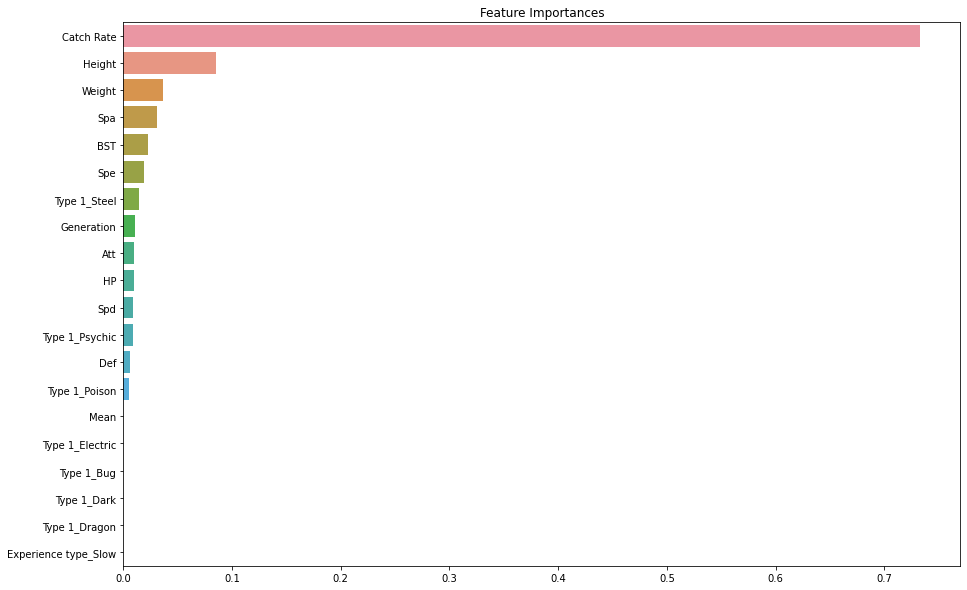

In [438]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

for i in range(len(y_test)):
    if p1[i] != predictions[i]:
      print(p1[i], predictions[i])
      if num[i] in df['Number']:
        print(df[df['Number']==num[i]].Name)
        
feature_importance_values = clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(15, 10))
plt.title('Feature Importances')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

# **Random Forest**

Accuracy: 0.9903381642512077
Precision: 1.0
Recall: 0.9230769230769231
F1-Score: 0.9600000000000001 

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       181
         1.0       1.00      0.92      0.96        26

    accuracy                           0.99       207
   macro avg       0.99      0.96      0.98       207
weighted avg       0.99      0.99      0.99       207

1.0 0.0
1021    Kubfu
Name: Name, dtype: object
1.0 0.0
831             Zygarde
832         Zygarde 10%
833    Zygarde Complete
Name: Name, dtype: object


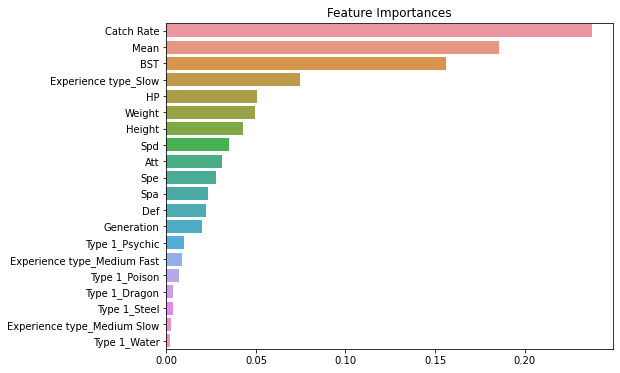

In [417]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

p = y_test
p=pd.DataFrame(p)
p1 = list(p['Legendary'])
num = p.index

for i in range(len(y_test)):
    if p1[i] != predictions[i]:
      print(p1[i], predictions[i])
      if num[i] in df['Number']:
        print(df[df['Number']==num[i]].Name)

feature_importance_values = clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

# **Train the Support Vector Classifier**

In [418]:
from sklearn.svm import SVC

model = SVC(gamma='auto')

model.fit(X_train,y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

Accuracy: 0.9565217391304348
Precision: 0.9047619047619048
Recall: 0.7307692307692307
F1-Score: 0.8085106382978723 

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       181
         1.0       0.90      0.73      0.81        26

    accuracy                           0.96       207
   macro avg       0.93      0.86      0.89       207
weighted avg       0.96      0.96      0.95       207



# **Gridsearch**

In [419]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.0001],
              'kernel': ['rbf']} 

In [420]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.885 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.885 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.885 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [439]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [440]:
predictions = grid.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

p = y_test
p=pd.DataFrame(p)
p1 = list(p['Legendary'])
num = p.index

for i in range(len(y_test)):
    if p1[i] != predictions[i]:
      print(p1[i], predictions[i])
      if num[i] in df['Number']:
        print(df[df['Number']==num[i]].Name)

Accuracy: 0.9806763285024155
Precision: 0.9230769230769231
Recall: 0.9230769230769231
F1-Score: 0.9230769230769231 

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       181
         1.0       0.92      0.92      0.92        26

    accuracy                           0.98       207
   macro avg       0.96      0.96      0.96       207
weighted avg       0.98      0.98      0.98       207

1.0 0.0
933    Blacephalon
Name: Name, dtype: object
0.0 1.0
535    Drapion
Name: Name, dtype: object
1.0 0.0
831             Zygarde
832         Zygarde 10%
833    Zygarde Complete
Name: Name, dtype: object
0.0 1.0
298         Tyranitar
299    Mega Tyranitar
Name: Name, dtype: object
